In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Lendo os dados

In [4]:
dados = pd.read_csv('DelayedFlights-Original.csv')
dados.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
Unnamed: 0           int64
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(11), object(5)
me

## Analise exploratoria

**Distribuição do atraso**

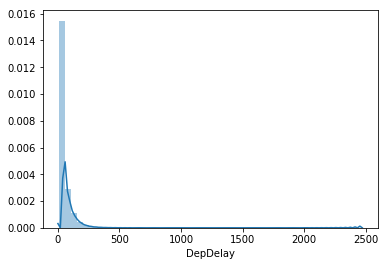

In [6]:
sns.distplot(dados.DepDelay)

In [7]:
dados.ArrDelay.mean()

42.19988477321014

In [8]:
dados.ArrDelay.describe()

count    1.928371e+06
mean     4.219988e+01
std      5.678472e+01
min     -1.090000e+02
25%      9.000000e+00
50%      2.400000e+01
75%      5.600000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64

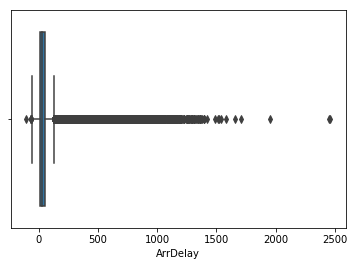

In [9]:
sns.boxplot(dados.ArrDelay)

**Atrasos por dias da semana/mês**

In [10]:
pivot = dados.pivot_table(values='ArrDelay',index='DayOfWeek',columns='Month')
pivot

Month,1,2,3,4,5,6,7,8,9,10,11,12
DayOfWeek,,,,,,,,,,,,
1,47.401979,47.537064,41.423590,37.039394,34.449134,44.835115,39.175617,49.703175,34.915111,26.960521,29.510604,47.401478
2,46.562240,54.829705,47.896318,36.397201,45.111993,43.965555,43.329090,38.583696,36.750935,33.380429,29.313846,48.899439
3,39.174579,44.123129,42.541562,32.051559,32.839229,45.955724,47.584394,35.703811,28.695008,37.561571,29.872776,48.537414
4,45.454427,36.150551,38.288050,39.466867,32.608669,46.764045,50.390376,46.748017,33.628877,28.836927,38.839335,43.942404
5,39.416878,44.504332,42.806341,51.632988,45.963931,45.671224,35.416907,41.132042,37.694330,33.571485,39.720556,55.133983
6,38.620309,37.055605,44.236217,35.006785,34.041249,42.982485,34.082678,37.647864,33.671510,30.573037,33.793369,54.867664
7,41.053469,48.136033,37.702107,35.577384,33.927246,53.302614,65.748014,39.411168,37.855338,28.336930,50.569314,48.488897


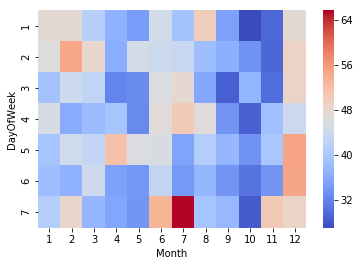

In [11]:
sns.heatmap(pivot,cmap='coolwarm');

**Correlação dos dados**

In [12]:
correlação = dados.corr()
correlação['ArrDelay'].sort_values()

ArrTime             -0.050948
Distance            -0.029853
CRSElapsedTime      -0.015676
SecurityDelay       -0.002488
Month               -0.000897
AirTime             -0.000189
Unnamed: 0           0.002571
DayofMonth           0.004129
DayOfWeek            0.006123
CRSArrTime           0.043078
CRSDepTime           0.044447
FlightNum            0.061266
ActualElapsedTime    0.068130
DepTime              0.127017
TaxiIn               0.156277
WeatherDelay         0.264624
TaxiOut              0.286484
NASDelay             0.387606
LateAircraftDelay    0.478123
CarrierDelay         0.501773
DepDelay             0.952927
ArrDelay             1.000000
Year                      NaN
Cancelled                 NaN
Diverted                  NaN
Name: ArrDelay, dtype: float64

In [14]:
dados = dados.drop('Year',axis=1)
iata = pd.read_csv('IataData.csv',encoding='latin')
iata

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
5,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,airport,OurAirports
6,7,Narsarsuaq Airport,Narssarssuaq,Greenland,UAK,BGBW,61.160500,-45.425999,112,-3,E,America/Godthab,airport,OurAirports
7,8,Godthaab / Nuuk Airport,Godthaab,Greenland,GOH,BGGH,64.190903,-51.678101,283,-3,E,America/Godthab,airport,OurAirports
8,9,Kangerlussuaq Airport,Sondrestrom,Greenland,SFJ,BGSF,67.012222,-50.711603,165,-3,E,America/Godthab,airport,OurAirports
9,10,Thule Air Base,Thule,Greenland,THU,BGTL,76.531197,-68.703201,251,-4,E,America/Thule,airport,OurAirports


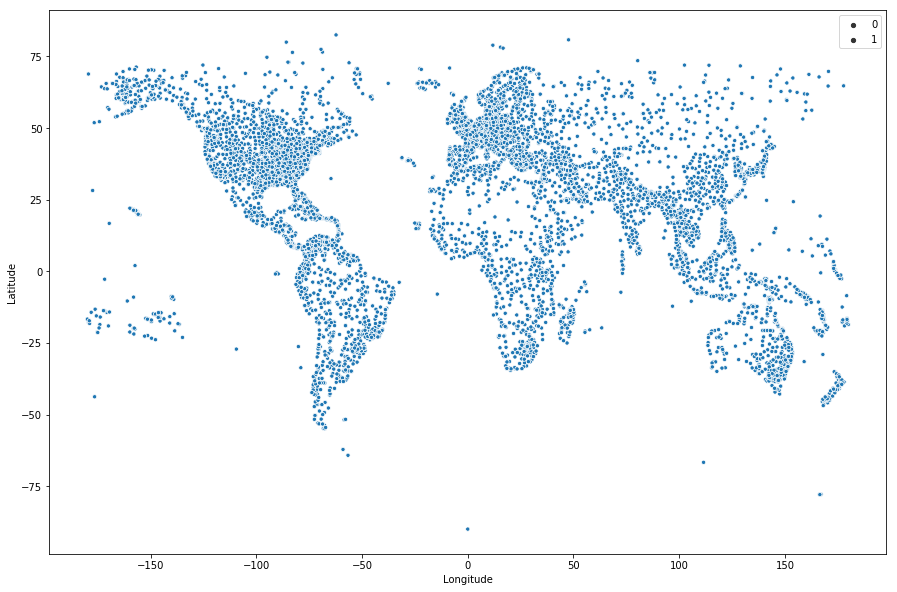

In [15]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=iata,x='Longitude',y='Latitude',size=1)

In [16]:
dados = dados.merge(iata,right_on="IATA",left_on ='Origin')

In [17]:
dados = dados.merge(iata,right_on="IATA",left_on ='Dest')

In [18]:
dados.head()

,Unnamed: 0,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,IATA_y,ICAO_y,Latitude_y,Longitude_y,Altitude_y,Timezone_y,DST_y,Tz database time zone_y,Type_y,Source_y
0,0,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,TPA,KTPA,27.9755,-82.533203,26,-5,A,America/New_York,airport,OurAirports
1,1,1,3,4,754.0,735,1002.0,1000,WN,3231,...,TPA,KTPA,27.9755,-82.533203,26,-5,A,America/New_York,airport,OurAirports
2,3437,1,4,5,2002.0,1955,2208.0,2225,WN,335,...,TPA,KTPA,27.9755,-82.533203,26,-5,A,America/New_York,airport,OurAirports
3,32741,1,13,7,2013.0,1915,2230.0,2145,WN,1369,...,TPA,KTPA,27.9755,-82.533203,26,-5,A,America/New_York,airport,OurAirports
4,42803,1,16,3,752.0,745,1005.0,1010,WN,26,...,TPA,KTPA,27.9755,-82.533203,26,-5,A,America/New_York,airport,OurAirports


In [19]:
dados = dados.drop(['Unnamed: 0','DepDelay','LateAircraftDelay','CarrierDelay','WeatherDelay'],axis=1)

**Processo machine Learning**

In [20]:
dados = dados.fillna(0)
y = dados['ArrDelay']
x = dados.drop('ArrDelay',axis=1)

In [21]:
for coluna in x:
    if x[coluna].dtype == object:
        print(coluna)
        x[coluna] = x[coluna].astype('category').cat.codes

UniqueCarrier
TailNum
Origin
Dest
CancellationCode
Name_x
City_x
Country_x
IATA_x
ICAO_x
Timezone_x
DST_x
Tz database time zone_x
Type_x
Source_x
Name_y
City_y
Country_y
IATA_y
ICAO_y
Timezone_y
DST_y
Tz database time zone_y
Type_y
Source_y


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

C:\Users\vinic\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


**KNN**

In [23]:
# modelo = KNeighborsRegressor()
# knnCros = cross_val_score(modelo,X=x,y=y,cv=5)
# knnCros.mean()

**ArvDesc**

In [24]:
modelo = DecisionTreeRegressor()
arv = cross_val_score(modelo,X=x,y=y,cv=5)
arv.mean()

0.9272137030814944

**RedeNeural**

In [ ]:
modelo = MLPRegressor()
rede = cross_val_score(modelo,X=x,y=y,cv=5)
rede.mean()